In [1]:
import matplotlib.pyplot as plt
import numpy as np
!wget https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv

--2021-07-20 18:21:13--  https://raw.githubusercontent.com/microsoft/ML-For-Beginners/main/2-Regression/data/US-pumpkins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172012 (168K) [text/plain]
Saving to: 'US-pumpkins.csv.2'

     0K .......... .......... .......... .......... .......... 29% 1.11M 0s
    50K .......... .......... .......... .......... .......... 59% 2.75M 0s
   100K .......... .......... .......... .......... .......... 89% 1.25M 0s
   150K .......... .......                                    100% 3.42M=0.1s

2021-07-20 18:21:14 (1.55 MB/s) - 'US-pumpkins.csv.2' saved [172012/172012]



In [2]:
import pandas as pd
data=pd.read_csv('US-pumpkins.csv')
data.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
data.isna().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [4]:
useful_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
data=data.drop([col for col in data.columns if col not in useful_columns],axis=1)

In [5]:
data.head()
price = (data['Low Price'] + data['High Price']) / 2
month=pd.DatetimeIndex(data['Date']).month

In [6]:
useful_data=pd.DataFrame({'Month': month, 'Package': data['Package'], 'Low Price': data['Low Price'],'High Price': data['High Price'], 'Price': price})


In [7]:
useful_data.head()


,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


In [8]:
data = data[data['Package'].str.contains('bushel', case=True, regex=True)]



In [9]:
data.head()

,Package,Date,Low Price,High Price
70,1 1/9 bushel cartons,9/24/16,15.0,15.0
71,1 1/9 bushel cartons,9/24/16,18.0,18.0
72,1 1/9 bushel cartons,10/1/16,18.0,18.0
73,1 1/9 bushel cartons,10/1/16,17.0,17.0
74,1 1/9 bushel cartons,10/8/16,15.0,15.0


In [10]:
useful_data.loc[useful_data['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)

useful_data.loc[useful_data['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

In [11]:
useful_data.head()

,Month,Package,Low Price,High Price,Price
0,4,24 inch bins,270.0,280.0,275.0
1,5,24 inch bins,270.0,280.0,275.0
2,9,24 inch bins,160.0,160.0,160.0
3,9,24 inch bins,160.0,160.0,160.0
4,11,24 inch bins,90.0,100.0,95.0


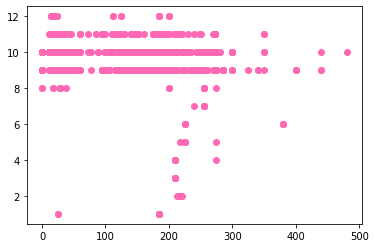

In [12]:
month=useful_data['Month']
price=useful_data['Price']
plt.scatter(price,month,c='hotpink')
plt.show()

Text(0, 0.5, 'Pumpkin Price')

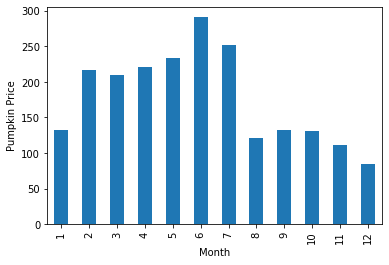

In [13]:
useful_data.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

In [14]:
from sklearn.preprocessing import LabelEncoder
useful_data.iloc[:, 0:-1] = useful_data.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)

In [15]:
print(useful_data['City'].corr(useful_data['Price']))


KeyError: 'City'